## Step 1 - Install Packages if Needed

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn jupyter

## Step 2 - Import the Packages

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Step 3 - Load the CSV Files 

In [7]:
tsla_df = pd.read_csv('TSLA.csv')
spy_df = pd.read_csv('SPY.csv')

## Step 4 - Convert 'Date' Column to datetime

In [8]:
tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])
spy_df['Date'] = pd.to_datetime(spy_df['Date'])

## Step 5 - Sort by Date

In [9]:
tsla_df = tsla_df.sort_values('Date') 
spy_df = spy_df.sort_values('Date') 

## Step 6 - Calculate Daily Returns

In [10]:
tsla_df['Return'] = tsla_df['Close'].pct_change() 
spy_df['Return'] = spy_df['Close'].pct_change() 

## Step 7 - Drop the first row with NaN values due to pct_change() and perform the calculations 

In [13]:
tsla_returns = tsla_df['Return'].dropna() 
spy_returns = spy_df['Return'].dropna() 

## Step 8 - Calculate the Average return 

In [15]:
tsla_average_return = np.mean(tsla_returns) 
spy_average_return = np.mean(spy_returns)  

print("Tesla Average 10y Return: ", tsla_average_return)
print("S&P 500 Average 10y Return: ", spy_average_return)

Tesla Average 10y Return:  0.001759057661325208
S&P 500 Average 10y Return:  0.0004872251753663349


Step 9 - Calculate Geo Mean of Average Returns

In [17]:
tsla_geo_mean_return = np.exp(np.mean(np.log(1 + tsla_returns))) - 1
spy_geo_mean_return = np.exp(np.mean(np.log(1 + spy_returns))) - 1 

print("Geometric Mean of Average Return - Tesla: ", tsla_geo_mean_return) 
print("Geometric Mean of Average Return - SPY: ", spy_geo_mean_return) 

Geometric Mean of Average Return - Tesla:  0.0011025030225420007
Geometric Mean of Average Return - SPY:  0.000423573298199198


## Step 9 - Calculate the Standard Deviation 

In [19]:
tsla_std_deviation = np.std(tsla_returns) 
spy_std_deviation = np.std(spy_returns) 

print("Standard Deviation - Tesla: ", tsla_std_deviation) 
print("Standard Deviation - SPY: ", spy_std_deviation) 

Standard Deviation - Tesla:  0.036315790160853546
Standard Deviation - SPY:  0.011266886781124743


## Step 9 - Calculate the Variance 

In [20]:
tsla_variance = np.var(tsla_returns) 
spy_variance = np.var(spy_returns) 

print("Variance from Average Return - Tesla: ", tsla_variance) 
print("Variance from Average Return - SPY: ", spy_variance) 

Variance from Average Return - Tesla:  0.0013188366150071473
Variance from Average Return - SPY:  0.00012694273773868346


## Step 10 - Calculate Tesla CoVariance with SPY

In [21]:
covariance_matrix = np.cov(tsla_returns, spy_returns) 
covariance = covariance_matrix[0, 1] 
print("Covariance with SPY Index - Tesla: ", covariance) 

Covariance with SPY Index - Tesla:  0.00019852525487674963


## Step 11 - Calculate Tesla Correlation to SPY 

In [23]:
correlation_matrix = np.corrcoef(tsla_returns, spy_returns) 
correlation = correlation_matrix[0, 1] 
print("Correlation with SPY Index - Tesla: ", correlation) 

Correlation with SPY Index - Tesla:  0.48501954193862257


## Step 11 - Visualize the Results

### Histogram of Tesla Returns

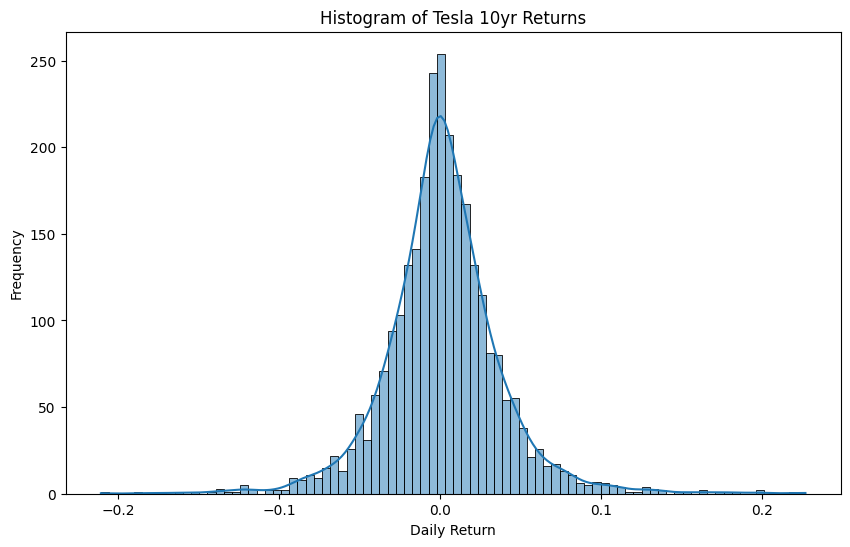

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(tsla_returns, kde=True) 
plt.title('Histogram of Tesla 10yr Returns') 
plt.xlabel('Daily Return') 
plt.ylabel('Frequency') 
plt.show() 

### Histogram of SPY 10yr Returns 

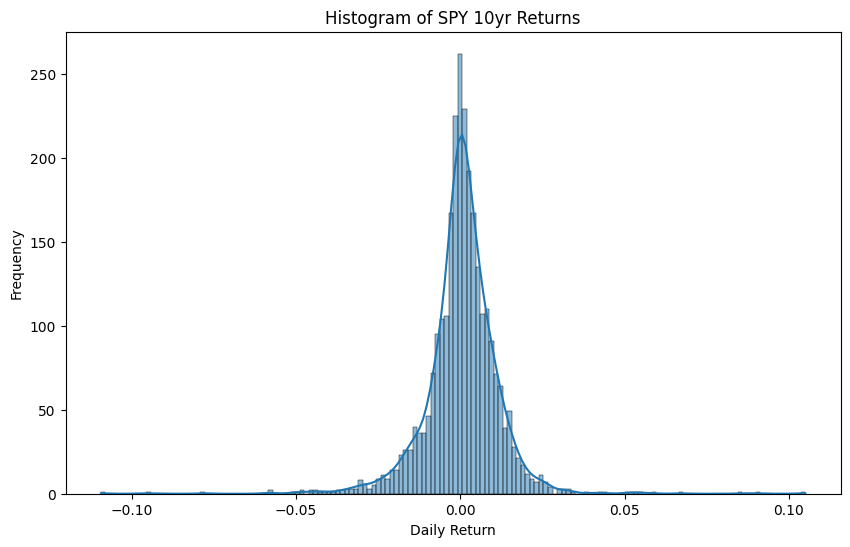

In [27]:
plt.figure(figsize=(10,6)) 
sns.histplot(spy_returns, kde=True) 
plt.title("Histogram of SPY 10yr Returns") 
plt.xlabel("Daily Return") 
plt.ylabel("Frequency") 
plt.show()

### Scatter Plot of Tesla Returns vs. SPY Returns 

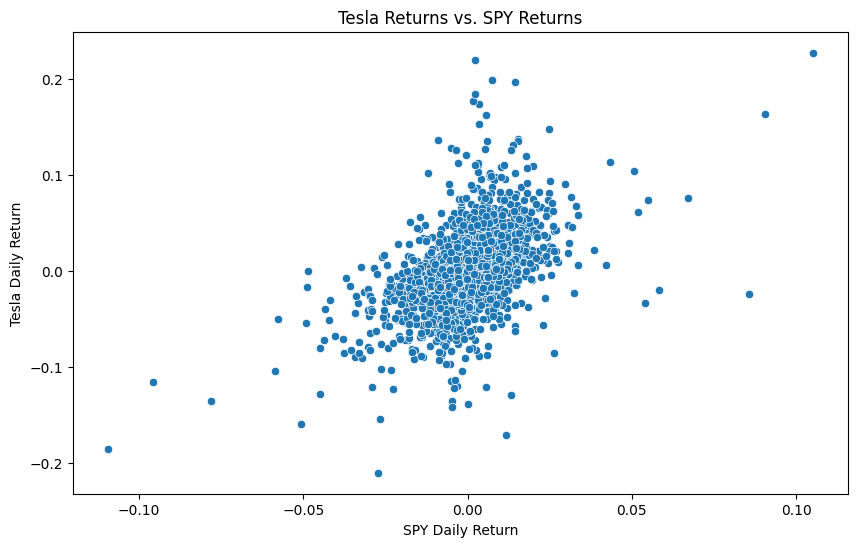

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=spy_returns, y=tsla_returns) 
plt.title("Tesla Returns vs. SPY Returns")
plt.xlabel("SPY Daily Return") 
plt.ylabel("Tesla Daily Return") 
plt.show()

### Box Plot of Tesla Returns 

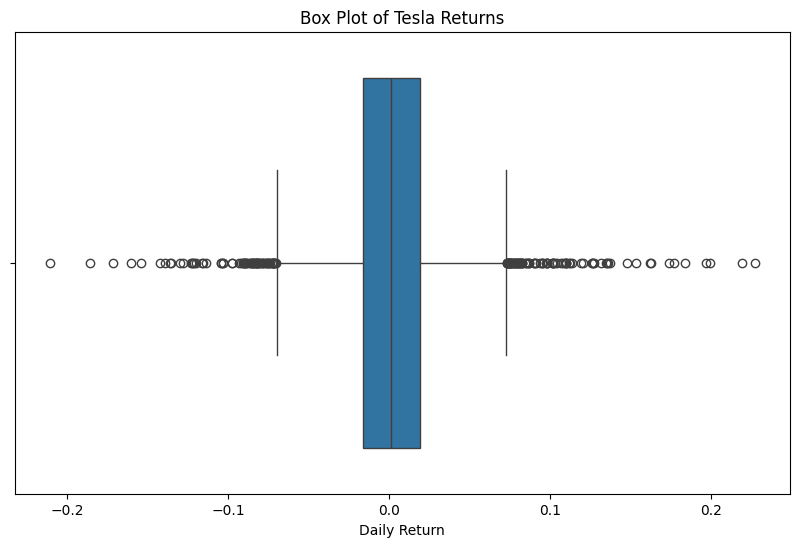

In [30]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x=tsla_returns) 
plt.title("Box Plot of Tesla Returns") 
plt.xlabel("Daily Return") 
plt.show() 

### Box Plot of SPY Returns 

### Line Chart Comparing Tesla returns vs, SPY returns 

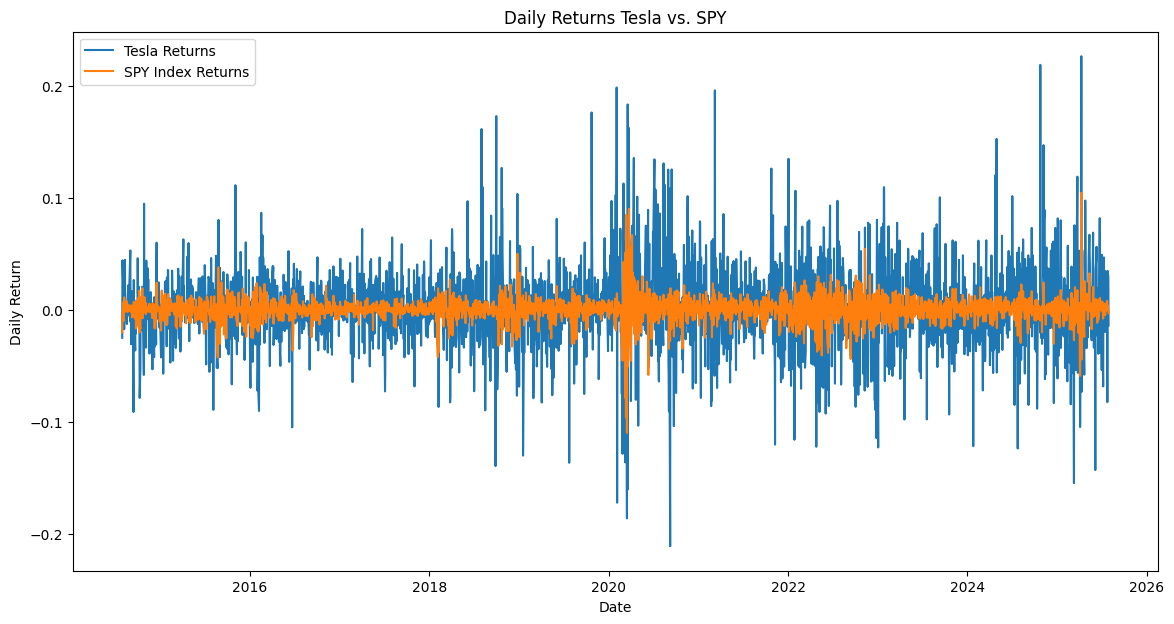

In [31]:
plt.figure(figsize=(14, 7)) 
plt.plot(tsla_df['Date'], tsla_df['Return'], label='Tesla Returns') 
plt.plot(spy_df['Date'], spy_df['Return'], label='SPY Index Returns') 
plt.title("Daily Returns Tesla vs. SPY") 
plt.xlabel('Date') 
plt.ylabel('Daily Return') 
plt.legend() 
plt.show() 